In [2]:
import numpy         as np
import pandas        as pd
import seaborn       as sns
from   scipy.special import factorial, gamma, gammainc
from   matplotlib    import pyplot as plt
import math

# Before we will setup the data to analyze i would like to define all mathematical methods used in this work 

In [3]:
def puasson(mean, value):
    return (mean ** value) * np.exp(-mean) / factorial(value)

In [4]:
def chi_squared_distribution(values, k = 1, dependent = 1): #main metrics
    k = values.shape[0] - dependent 
    return (gammainc(k / 2, values / 2) / gamma(k / 2)) 

In [5]:
def chi_squared_probability_density(values, k = 1):        #main metrics
    return ((0.5) ** (k / 2) / gamma(k / 2)) * (values ** (k / 2 - 1)) * np.exp(-values / 2)

# Part. 1. Analysis of Oscillograph data 

In [5]:
frame = pd.read_csv("20_minutes_second_attempts.csv") 

/tmp/ipykernel_4762/3585672135.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  frame = pd.read_csv("20_minutes_second_attempts.csv")


In [6]:
frame              = frame.iloc[1:]
time_zero          = float(frame['Time'][1])
chanel_zero        = float(frame['Channel A'][1])
frame['Time']      = pd.to_numeric(frame['Time'])
frame['Channel A'] = pd.to_numeric(frame['Channel A'])

In [7]:
frame['Time']      = frame['Time']      - time_zero
frame['Channel A'] = frame['Channel A'] - chanel_zero
frame['Channel A'] = round(frame['Channel A'], 3)

In [8]:
frame.head(10)

,Time,Channel A
1,0.00000,0.000
2,0.00002,0.446
3,0.00004,0.000
4,0.00006,0.000
5,0.00008,0.000
6,0.00010,0.000
7,0.00012,0.000
8,0.00014,0.000
9,0.00016,0.000
10,0.00018,0.000


In [9]:
delta_time = frame['Time'][2] - frame['Time'][1] # 1 / discretisation
print(delta_time)

2.0000000063191692e-05


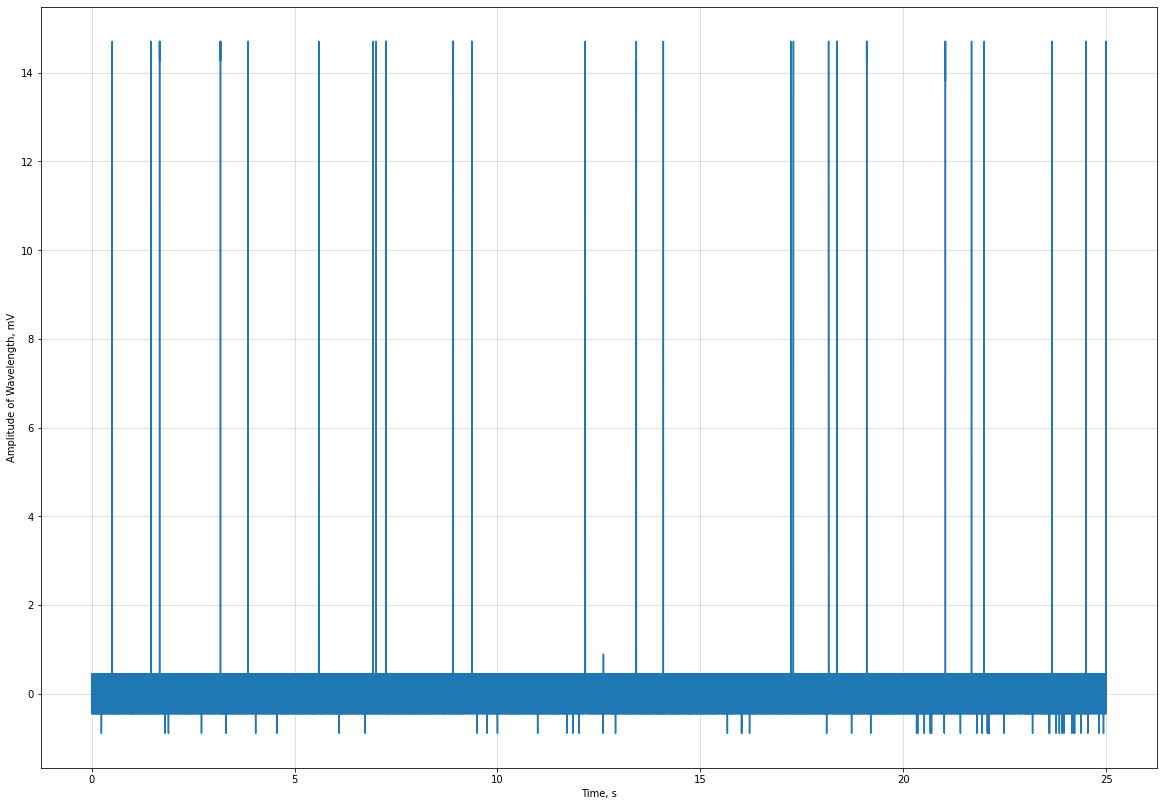

In [10]:
plt.figure(figsize = (20, 14))
plt.plot(frame[:25 * round(1 / delta_time) + 1]['Time'], frame[:25 * round(1 / delta_time) + 1]['Channel A'])
plt.xlabel("Time, s")
plt.ylabel("Amplitude of Wavelength, mV") 
plt.grid(alpha = 0.5)
plt.show()

In [11]:
wave_none = frame

In [12]:
wave_none['Channel A'] = wave_none['Channel A'] > 2

In [13]:
wave_none['Channel A'] = wave_none['Channel A'].astype(int)

In [14]:
wave_none.head(10)

,Time,Channel A
1,0.00000,0
2,0.00002,0
3,0.00004,0
4,0.00006,0
5,0.00008,0
6,0.00010,0
7,0.00012,0
8,0.00014,0
9,0.00016,0
10,0.00018,0


In [15]:
wave_ = wave_none[:25 * round(1 / delta_time) + 1]

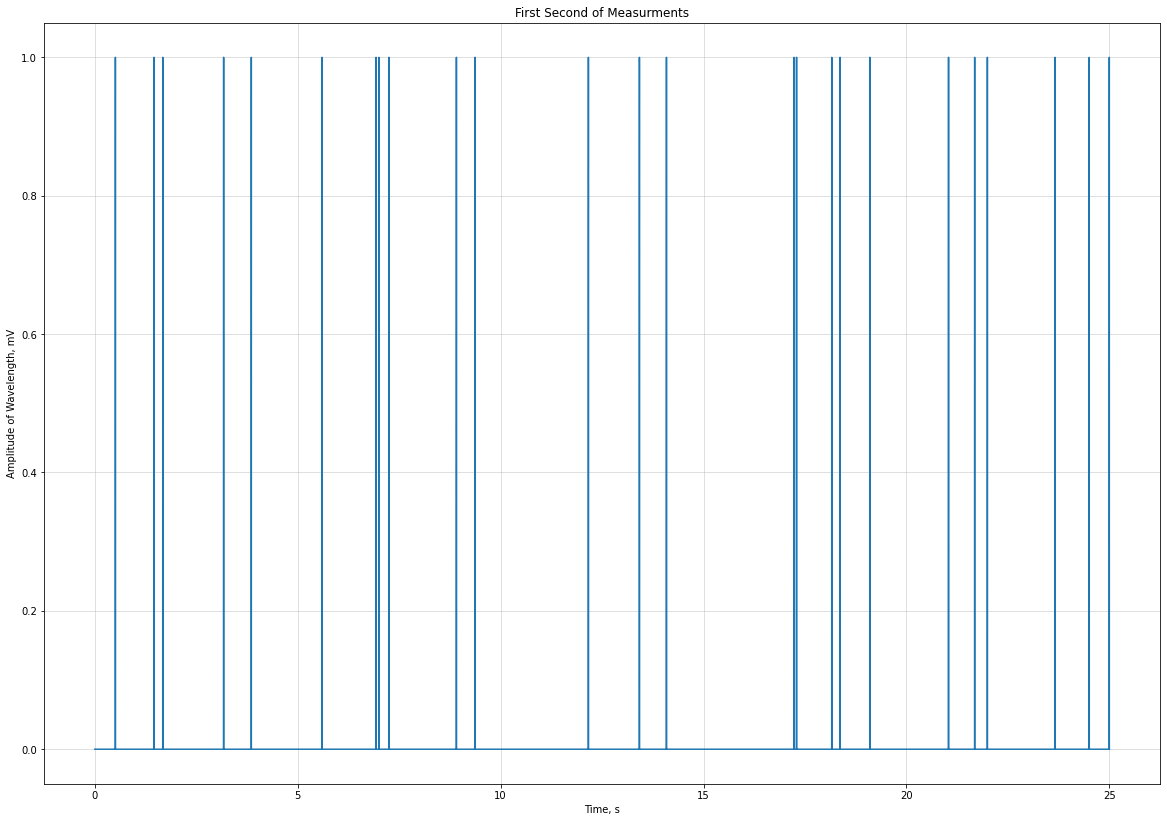

In [16]:
plt.figure(figsize = (20, 14))
plt.plot(wave_['Time'], wave_['Channel A'])
plt.xlabel("Time, s")
plt.ylabel("Amplitude of Wavelength, mV") 
plt.title("First Second of Measurments")
plt.grid(alpha = 0.5)
plt.show()

In [17]:
wave_[:1 * round(1 / delta_time) + 1]['Channel A'].sum()

85

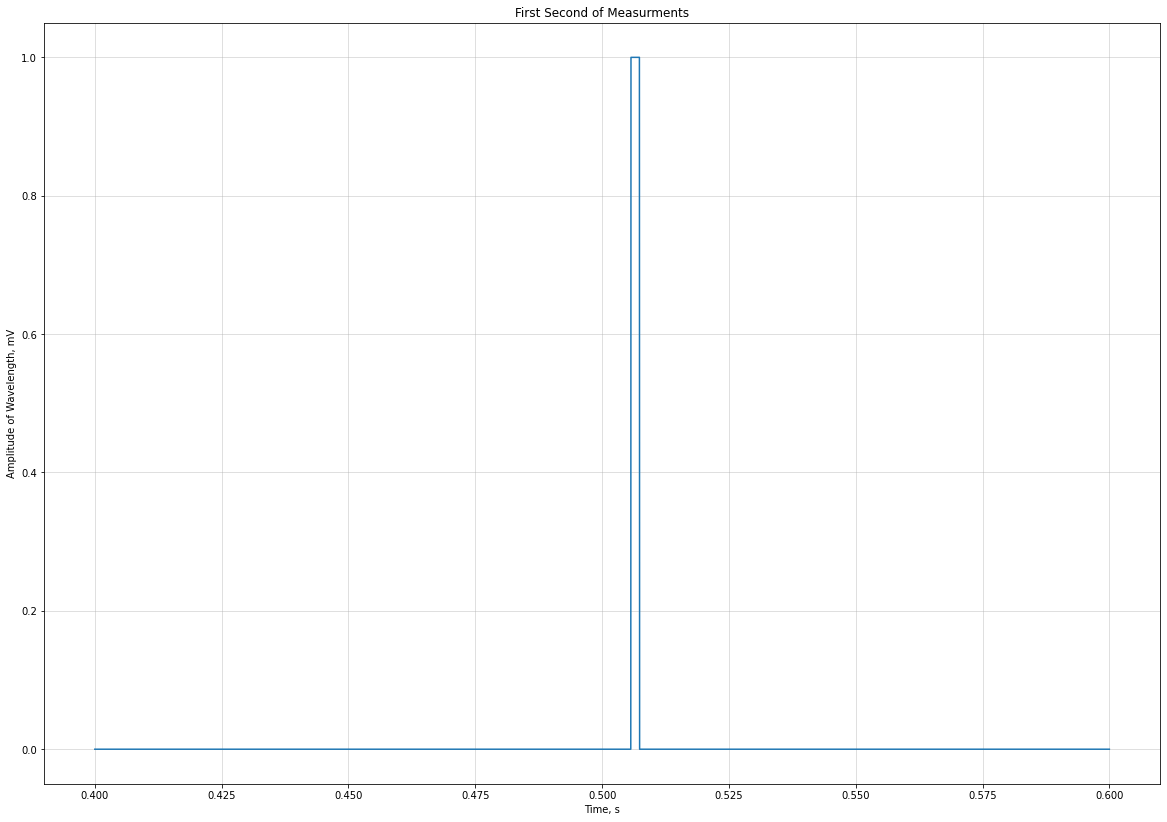

In [18]:
plt.figure(figsize = (20, 14))
plt.plot(wave_[round(0.4  / delta_time): round(0.6 / delta_time) + 1]['Time'], wave_[round(0.4  / delta_time): round(0.6  / delta_time) + 1]['Channel A'])
plt.xlabel("Time, s")
plt.ylabel("Amplitude of Wavelength, mV") 
plt.title("First Second of Measurments")
plt.grid(alpha = 0.5)
plt.show()

In [19]:
wave_22 = wave_none[5 * round(1 / delta_time):10 * round(1 / delta_time) + 1]

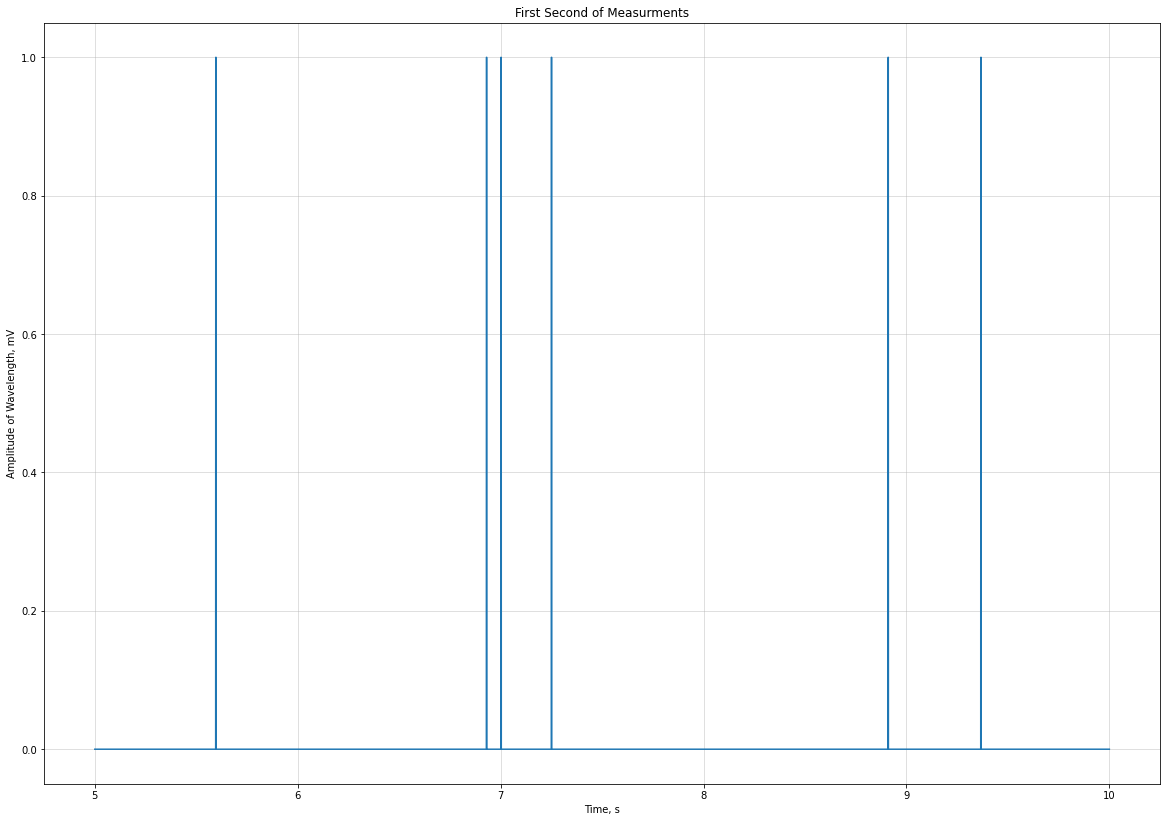

In [20]:
plt.figure(figsize = (20, 14))
plt.plot(wave_22['Time'], wave_22['Channel A'])
plt.xlabel("Time, s")
plt.ylabel("Amplitude of Wavelength, mV") 
plt.title("First Second of Measurments")
plt.grid(alpha = 0.5)
plt.show()

In [21]:
indexes_of_zeros = wave_none[wave_none['Channel A'] == 0]['Channel A'].index.to_numpy()
indexes_of_zeros += 1

In [22]:
indexes_of_ones = []

In [23]:
for i in indexes_of_zeros[:-1]:
    if wave_none['Channel A'][i] == 1:
        indexes_of_ones = np.append(indexes_of_ones, [i])

In [24]:
times = np.array([])
for i in indexes_of_ones:
    times = np.append(times, wave_none['Time'][i])

In [25]:
step        = 5
itterations = np.array([])
T           = times.max().astype(int)

#j = 1
for i in range(0, T, step):
    times__sum = times[(times >= i) & (times < i + step)].shape[0]
    itterations = np.append(itterations, [times__sum])
    #print("TEST {0}, SHAPE : {1}".format(j, itterations.shape[0]))
    #j += 1

In [26]:
print(itterations.shape[0]) #amount of data to be putted in charts 

246


In [27]:
x, y = np.unique(itterations, return_counts=True)
y_0  = y
y    = y / y.sum()

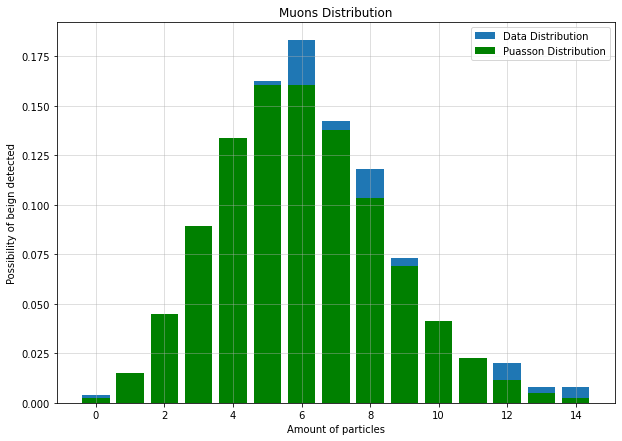

In [39]:
plt.figure(figsize = (10, 7))
plt.title("Muons Distribution")
plt.bar(x, y, label = 'Data Distribution')
plt.bar(x, puasson(6, x), color = 'g', label = 'Puasson Distribution')
plt.xlabel("Amount of particles")
plt.ylabel("Possibility of beign detected")
plt.grid(alpha = 0.5)
plt.legend()
plt.show()

In [29]:
frame_2 = pd.read_csv("20_minutes_measures.csv") 
frame_2                  = frame_2.iloc[1:]
time_zero_2              = float(frame_2['Time'][1])
chanel_zero_2            = float(frame_2['Channel A'][1])
frame_2['Time']          = pd.to_numeric(frame_2['Time'])
frame_2['Channel A']     = pd.to_numeric(frame_2['Channel A'])
frame_2['Time']          = frame_2['Time']      - time_zero_2
frame_2['Channel A']     = frame_2['Channel A'] - chanel_zero_2
frame_2['Channel A']     = round(frame_2['Channel A'], 3)
delta_time_2 = frame_2['Time'][2] - frame_2['Time'][1] # 1 / discretisation

/tmp/ipykernel_4762/1888425708.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  frame_2 = pd.read_csv("20_minutes_measures.csv")
/tmp/ipykernel_4762/1888425708.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_2['Time']          = pd.to_numeric(frame_2['Time'])


In [30]:
wave_none_2 = frame_2
wave_none_2['Channel A'] = (wave_none_2['Channel A'] > 5).astype(int)

In [31]:
indexes_of_zeros_2 = wave_none_2[wave_none_2['Channel A'] == 0]['Channel A'].index.to_numpy()
indexes_of_zeros_2 += 1

In [32]:
indexes_of_ones_2 = []

In [33]:
for i in indexes_of_zeros_2[:-1]:
    if wave_none_2['Channel A'][i] == 1:
        indexes_of_ones_2 = np.append(indexes_of_ones_2, [i])

In [34]:
times_2 = np.array([])
for i in indexes_of_ones_2:
    times = np.append(times_2, wave_none_2['Time'][i])

In [35]:
step          = 5
itterations_2 = np.array([])
T             = times.max().astype(int)

#j = 1
for i in range(0, T, step):
    times__sum    = times_2[(times_2 >= i) & (times_2 < i + step)].shape[0]
    itterations_2 = np.append(itterations, [times__sum])
    #print("TEST {0}, SHAPE : {1}".format(j, itterations.shape[0]))
    #j += 1

In [36]:
x_2, y_2 = np.unique(itterations_2[itterations_2 != 0], return_counts=True)
y_2_o    = y_2
y_2      = y_2 / y_2.sum()

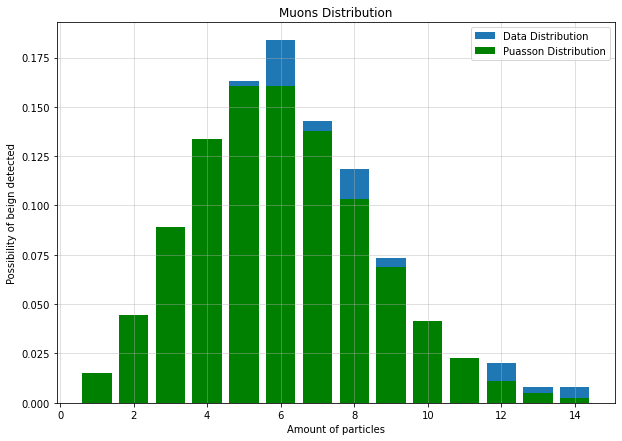

In [40]:
plt.figure(figsize = (10, 7))
plt.title("Muons Distribution")
plt.bar(x_2, y_2, label = 'Data Distribution')
plt.bar(x_2, puasson(6, x_2), color = 'g', label = 'Puasson Distribution')
plt.xlabel("Amount of particles")
plt.ylabel("Possibility of beign detected")
plt.grid(alpha = 0.5)
plt.legend()
plt.show()

In [38]:
itterations_3 = np.concatenate((itterations, itterations_2))
itterations_3 = itterations_3[itterations_3 != 0]
x_3, y_3      = np.unique(itterations_3, return_counts=True)
y_3           = y_3 / y_3.sum()

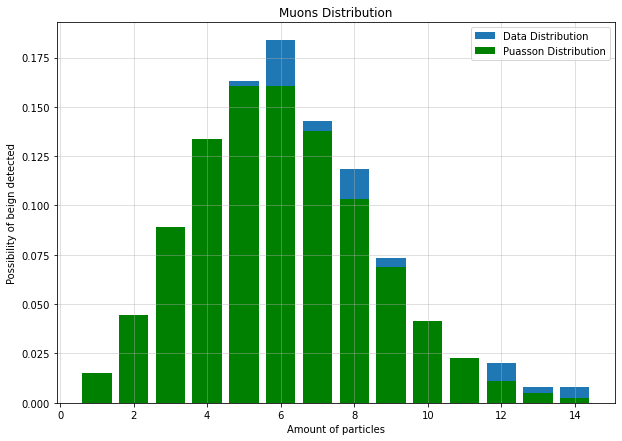

In [41]:
plt.figure(figsize = (10, 7))
plt.title("Muons Distribution")
plt.bar(x_3, y_3, label = 'Data Distribution')
plt.bar(x_3, puasson(6, x_3), color = 'g', label = 'Puasson Distribution')
plt.xlabel("Amount of particles")
plt.ylabel("Possibility of beign detected")
plt.grid(alpha = 0.5)
plt.legend()
plt.show() 

# Part. 2. Analysis of STAT (MIPT computer software to be used with particles detector) data

In [79]:
machine_data = pd.read_csv("MachineData.csv")
machine_data.head()

,N,n(40),w,Pn
0,1,37,0.01,0.010
1,2,38,0.02,0.013
2,1,39,0.01,0.017
3,3,40,0.03,0.021
4,3,42,0.03,0.031


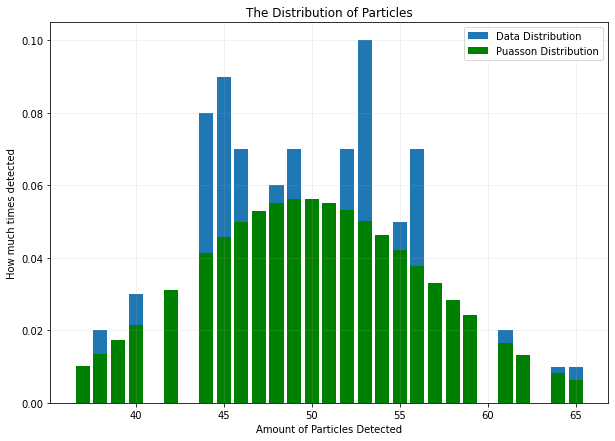

In [5]:
plt.figure(figsize=(10, 7))
plt.title("The Distribution of Particles")
plt.bar(machine_data['n(40)'], machine_data['w'], label = 'Data Distribution')
plt.bar(machine_data['n(40)'], puasson(50, machine_data['n(40)'].to_numpy().astype(float)), color = 'g', label = 'Puasson Distribution')
plt.grid(alpha = 0.2)
plt.xlabel("Amount of Particles Detected")
plt.ylabel("How much times detected")
plt.legend()
plt.show()

In [7]:
machine_data_2 = pd.read_csv("MachineData2.csv")
machine_data_2.head()

,n(20),N,w,Pn
0,11,1,0.005,0.0008
1,14,2,0.010,0.0059
2,15,3,0.015,0.0099
3,16,4,0.020,0.0155
4,17,2,0.010,0.0227


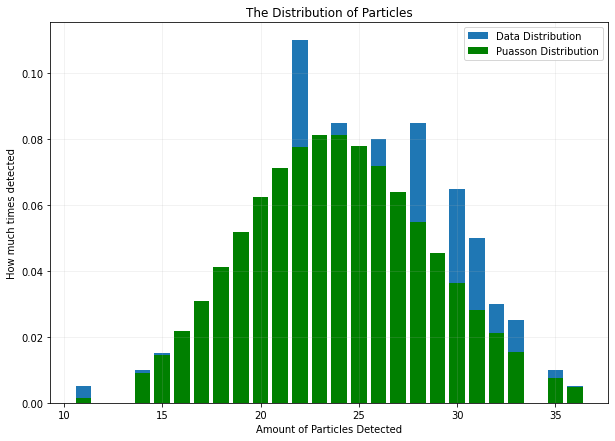

In [104]:
plt.figure(figsize=(10, 7))
plt.title("The Distribution of Particles")
plt.bar(machine_data_2['n(20)'], machine_data_2['w'], label = 'Data Distribution')
plt.bar(machine_data_2['n(20)'], puasson(24, machine_data_2['n(20)'].to_numpy().astype(float)), color = 'g', label = 'Puasson Distribution')
#plt.plot(machine_data_2['n(20)'], chi_squared_probability_density(puasson(24, machine_data_2['n(20)'].to_numpy().astype(float)) - machine_data_2['n(20)'], k = 22), color = 'r', label = 'Chi-2 Distribution')
plt.grid(alpha = 0.2)
plt.xlabel("Amount of Particles Detected")
plt.ylabel("How much times detected")
plt.legend()
plt.show()

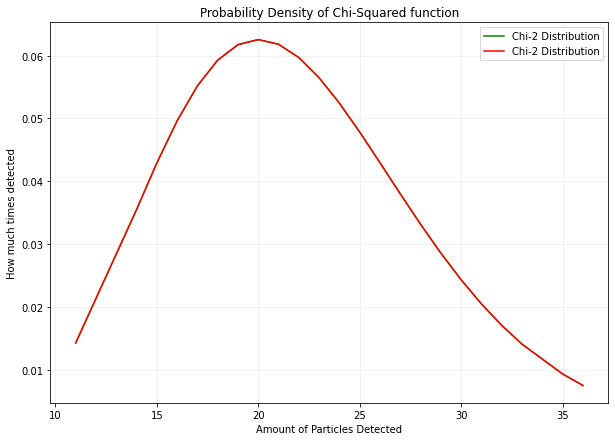

In [9]:
plt.figure(figsize=(10, 7))
plt.title("Probability Density of Chi-Squared function")
plt.plot(machine_data_2['n(20)'], chi_squared_probability_density(machine_data_2['n(20)'], k = 22), color = 'g', label = 'Chi-2 Distribution')
plt.plot(machine_data_2['n(20)'], chi_squared_probability_density(machine_data_2['n(20)'], k = 22), color = 'r', label = 'Chi-2 Distribution')
plt.grid(alpha = 0.2)
plt.xlabel("Amount of Particles Detected")
plt.ylabel("How much times detected")
plt.legend()
plt.show()

In [56]:
machine_data_2['n(20)'] -= machine_data_2['n(20)'].mean()

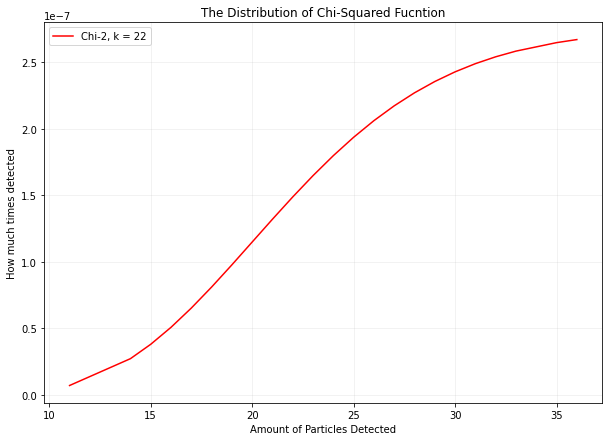

In [64]:
plt.figure(figsize=(10, 7))
plt.title("The Distribution of Chi-Squared Fucntion")
plt.plot(machine_data_2['n(20)'], chi_squared_distribution(machine_data_2['n(20)'], k = 2), color = 'r', label = 'Chi-2, k = 22')
plt.grid(alpha = 0.2)
plt.xlabel("Amount of Particles Detected")
plt.ylabel("How much times detected")
plt.legend()
plt.show()